In [54]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/telco_customer_churn.csv')
print(df.columns)
#print(df.head())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [44]:
df.drop(['customerID'],axis=1)

df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'],errors='coerce')
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

ini_array=df['TotalCharges'].values

#print(ini_array)
#insert an average for the missing total charges
res = np.where(np.isnan(ini_array), np.ma.array(ini_array, 
               mask = np.isnan(ini_array)).mean(axis = 0), ini_array)  

df['TotalCharges']=res

df['Churn']=df['Churn'].astype('category').cat.codes
df['gender']=df['gender'].astype('category').cat.codes
df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['Partner']=df['Partner'].astype('category').cat.codes
df['Dependents']=df['Dependents'].astype('category').cat.codes
df['PhoneService']=df['PhoneService'].astype('category').cat.codes
df['MultipleLines']=df['MultipleLines'].astype('category').cat.codes
df['InternetService']=df['InternetService'].astype('category').cat.codes

df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup']=df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection']=df['DeviceProtection'].astype('category').cat.codes
df['TechSupport']=df['TechSupport'].astype('category').cat.codes

df['StreamingTV']=df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies']=df['StreamingMovies'].astype('category').cat.codes
df['Contract']=df['Contract'].astype('category').cat.codes
df['PaperlessBilling']=df['PaperlessBilling'].astype('category').cat.codes
df['PaymentMethod']=df['PaymentMethod'].astype('category').cat.codes


In [60]:
def auc(variables, target, basetable):
    X = basetable[variables]
    y= basetable[target]

    logreg=LogisticRegression(max_iter=2000)
    logreg.fit(X,y.values.ravel())
    predictions=logreg.predict_proba(X)[:,1]
    auc=roc_auc_score(y, predictions)
    return auc

def next_best(current_variables, candidate_variables, target, basetable):
    best_auc=-1
    best_variable=None
    for v in candidate_variables:
        auc_v= auc(current_variables+[v],target, basetable)
        if auc_v >= best_auc:
            best_auc=auc_v
            best_variable=v
    return (best_variable,best_auc)

['tenure', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'PhoneService', 'TechSupport', 'TotalCharges', 'PaperlessBilling', 'OnlineBackup', 'SeniorCitizen', 'DeviceProtection', 'Dependents', 'PaymentMethod', 'InternetService', 'MultipleLines', 'gender', 'Partner', 'StreamingMovies', 'StreamingTV']


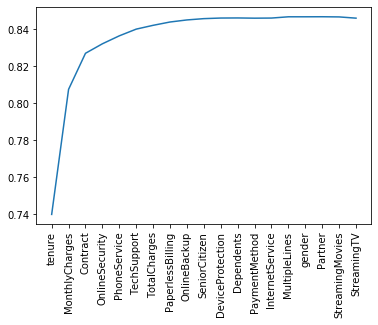

In [62]:
candidate_variables=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
current_variables=[]
auc_scores=[]
target=['Churn']
max_number_variables=len(candidate_variables)

number_iterations=min(max_number_variables, len(candidate_variables))

for i in range(0,number_iterations):
    next_variable,auc_variable= next_best(current_variables, candidate_variables, target, df)
    current_variables=current_variables+[next_variable]
    auc_scores=auc_scores+[auc_variable]
    candidate_variables.remove(next_variable)

print(current_variables)
x=np.array(range(0,len(auc_scores)))
y = np.array(auc_scores)
plt.xticks(x, current_variables, rotation = 90)
plt.plot(x,y)
plt.show()
